In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
hdfc = pd.read_csv('../data/high/HDFC.csv')
icici = pd.read_csv('../data/high/ICICI.csv')
reliance = pd.read_csv('../data/high/RELIANCE.csv')
wipro = pd.read_csv('../data/high/WIPRO.csv')
hcltech = pd.read_csv('../data/high/HCLTECH.csv')

In [3]:
close_df = pd.DataFrame()

close_df['Date'] = hdfc['Date']
close_df['HDFC'] = hdfc['Close']
close_df['ICICI'] = icici['Close']
close_df['RELIANCE'] = reliance['Close']
close_df['WIPRO'] = wipro['Close']
close_df['HCLTECH'] = hcltech['Close']

close_df = close_df.set_index('Date')

In [4]:
close_df

,HDFC,ICICI,RELIANCE,WIPRO,HCLTECH
Date,,,,,
26/05/16,591.63,219.23,473.43,204.36,370.45
27/05/16,593.40,221.05,487.35,204.53,378.80
30/05/16,589.88,222.27,484.35,206.31,373.78
31/05/16,590.95,222.41,478.93,204.54,369.90
01/06/16,587.58,218.23,476.80,207.94,367.28
...,...,...,...,...,...
20/05/21,1432.80,618.60,1985.40,508.25,924.40
21/05/21,1497.30,642.45,2002.55,512.70,930.65
24/05/21,1509.95,647.35,1985.65,514.90,932.80


In [5]:
daily_ret = close_df.pct_change()
daily_ret = daily_ret.dropna()

In [6]:
volatility_df = daily_ret.rolling(window=252).std() * np.sqrt(252)

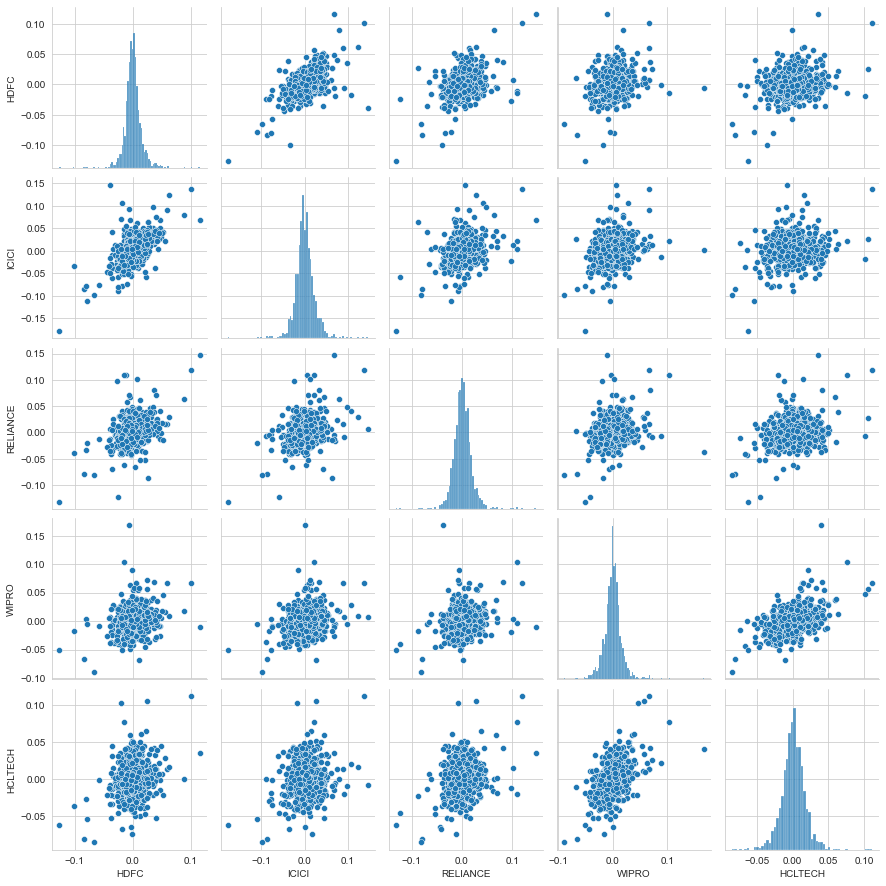

In [7]:
sns.pairplot(daily_ret)

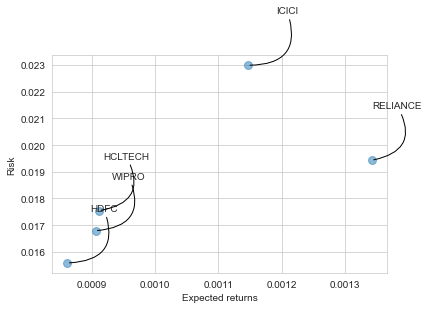

In [8]:
area = np.pi*20

plt.scatter(daily_ret.mean(), daily_ret.std(),alpha = 0.5,s =area)

plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x, y in zip(daily_ret.columns, daily_ret.mean(), daily_ret.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.7', color = 'black'))

<AxesSubplot:xlabel='Date'>

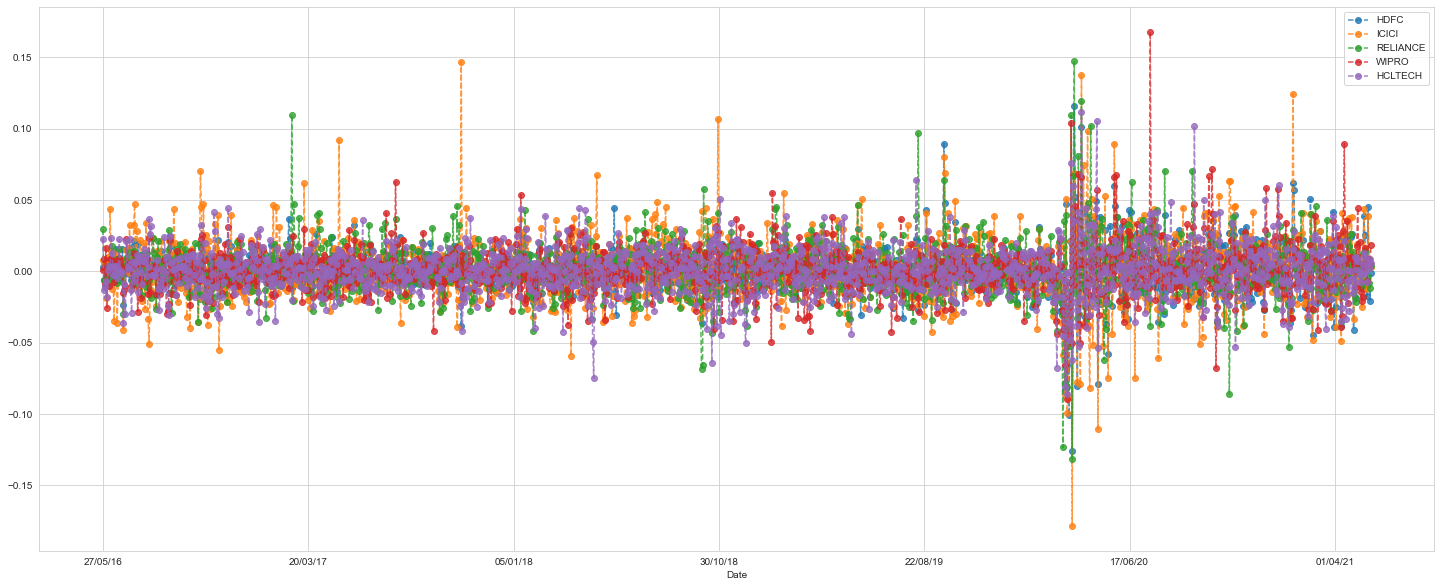

In [9]:
daily_ret.plot(figsize=(25,10),legend=True,linestyle='--',marker='o',alpha=0.8)

<AxesSubplot:xlabel='Date'>

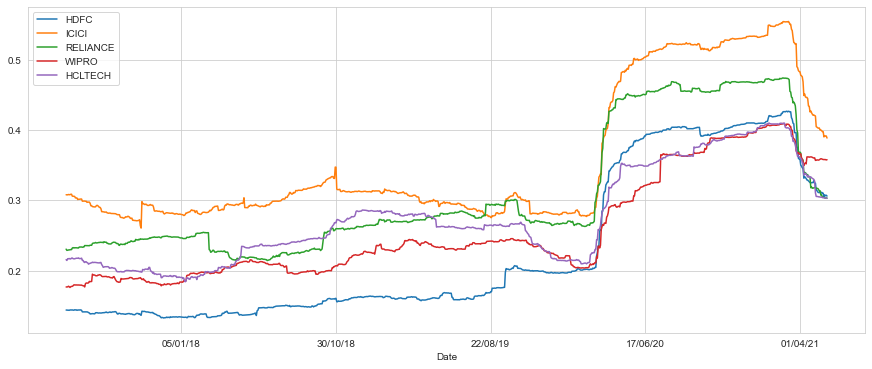

In [10]:
volatility_df.plot(figsize=(15, 6))